/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


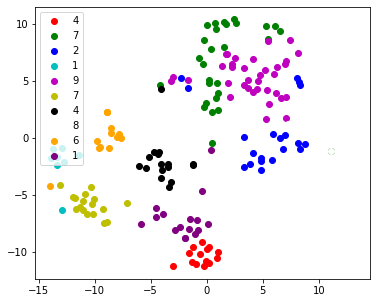

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/data.csv'
#mydata=pd.read_csv(url, delimiter=",", names=['col1','col2','col3','col4','col5'])
mydata=pd.read_csv(url)
#print(mydata)

# Create pairwise distance matrix
from scipy.spatial.distance import pdist, squareform
import numpy as np
Out = squareform(pdist(np.sqrt(mydata)))/np.sqrt(2)

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
tsne = TSNE(n_components=2, random_state=0)
kmns = KMeans(n_clusters=10).fit(Out)

X_2d = tsne.fit_transform(Out)
y=kmns.labels_
#print(y)

target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, y):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()